# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import pearsonr
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

# Data Information

The dataset selected for this project represents Breast Cancer from the Wisconsin Breast Cancer Database.


It contains data of 357 benign and 212 malignant cancers.


[Link](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data) to database.


# Import Data

In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Columns Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

* **radius** (mean of distances from center to points on the perimeter)
* **texture** (standard deviation of gray-scale value
* **perimeter**
* **area**
* **smoothness** (local variation in radius length)
* **compactness** (perimeter^2 / a - 1.0)
* **concavity** (severity of concave portions of the contour)
* **concave points** (number of concave portions  contour)
* **symmetry**
* **fractal dimension** ("coastline approximation" - 1)


The **mean**, **standard error** and **worst** or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# EDA

Before making data cleansing and feature selection, feature extraction and classification, a preliminary analysis will be done. The idea is to identify correlations, outliers and the need to perform normalization or standarization. For that we will perform some visualizations.

## Missing Values

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Drop Columns

In [24]:
# Remove unnecesary columns

dropped_columns = ['Unnamed: 32','id','diagnosis']

## Duplicates

In [7]:
print(f"Number of duplicated rows = {df.duplicated().sum()}")

Number of duplicated rows = 0


## Select Target

In [25]:
# Select features
X = df.drop(dropped_columns,axis = 1 )
y = df.diagnosis

X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

## Count Plot

The counplot helps to visualize the number of values in the target.

Number of Benign:  357
Number of Malignant :  212


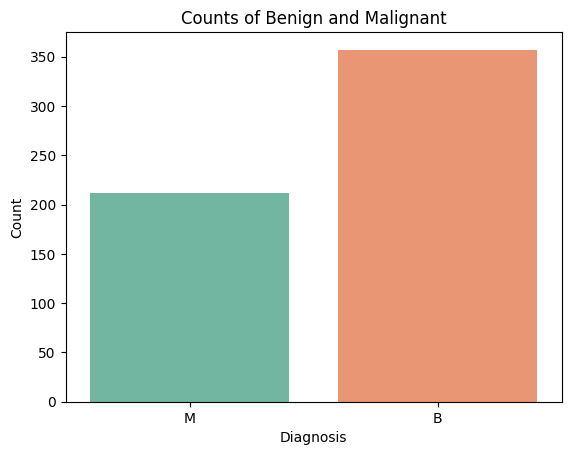

In [8]:
# Create a countplot with vertical bars and 'y' as the main category
ax = sns.countplot(x=y, palette="Set2")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Counts of Benign and Malignant')

# Count occurrences of each category
B = sum(1 for i in y if i == 'B')
M = sum(1 for i in y if i == 'M')

print('Number of Benign: ',B)
print('Number of Malignant : ',M)

plt.show()


## Feature Distribution

In a first step we will scale the features with the StandardScaler in order to visualize them.

### Violin Plot

A good way to visualize the distribution of the features is using the violinplot. It shows the distribution of data points after grouping by one (or more) variables. 

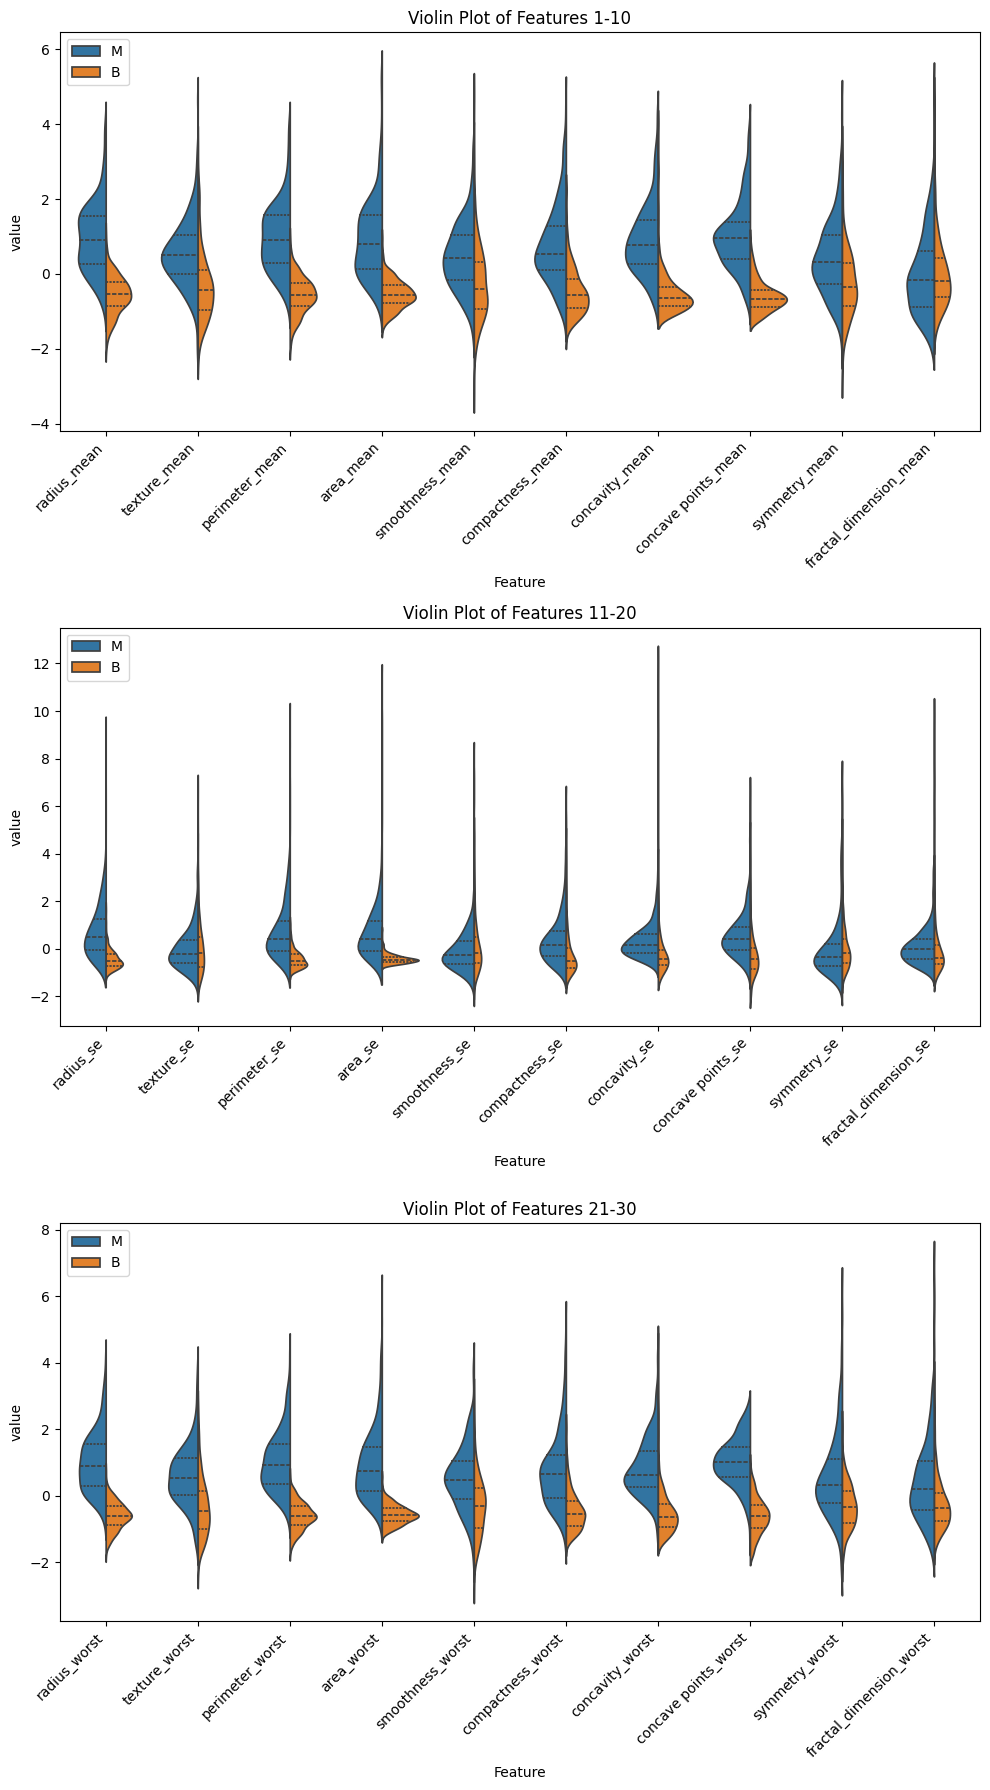

In [9]:
# Violinplot of the complete feature, sepatated into Benign and Malignant

# Scaling the data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

# Adding a 'diagnosis' column containing 'M' or 'B' values
scaled_df['diagnosis'] = y

# Dividing the features into three sets for subplots
features_1 = scaled_df.columns[:10]
features_2 = scaled_df.columns[10:20]
features_3 = scaled_df.columns[20:]

# Creating subplots for M and B categories separately
plt.figure(figsize=(10, 18))

for i, features in enumerate([features_1, features_2, features_3], start=1):
    plt.subplot(3, 1, i)
    data_to_plot = pd.melt(scaled_df, id_vars='diagnosis', value_vars=features, var_name='Feature')
    sns.violinplot(x='Feature', y='value', hue='diagnosis', data=data_to_plot, split=True, inner="quart")
    plt.title(f'Violin Plot of Features {i * 10 - 9}-{i * 10}')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

It can be seen that some features like **concavity_mean** are well separated, which is good for classification purposes. Others like **symmetry_worst** are not separated, as the distribution of Benign and Malignant is similar.

### Swarm Plot

Another way to visualize the distribution of the features is using the swarmplot. It draw a categorical scatterplot with points adjusted to be non-overlapping. . This gives a better representation of the distribution of values, but it does not scale well to large numbers of observation”.

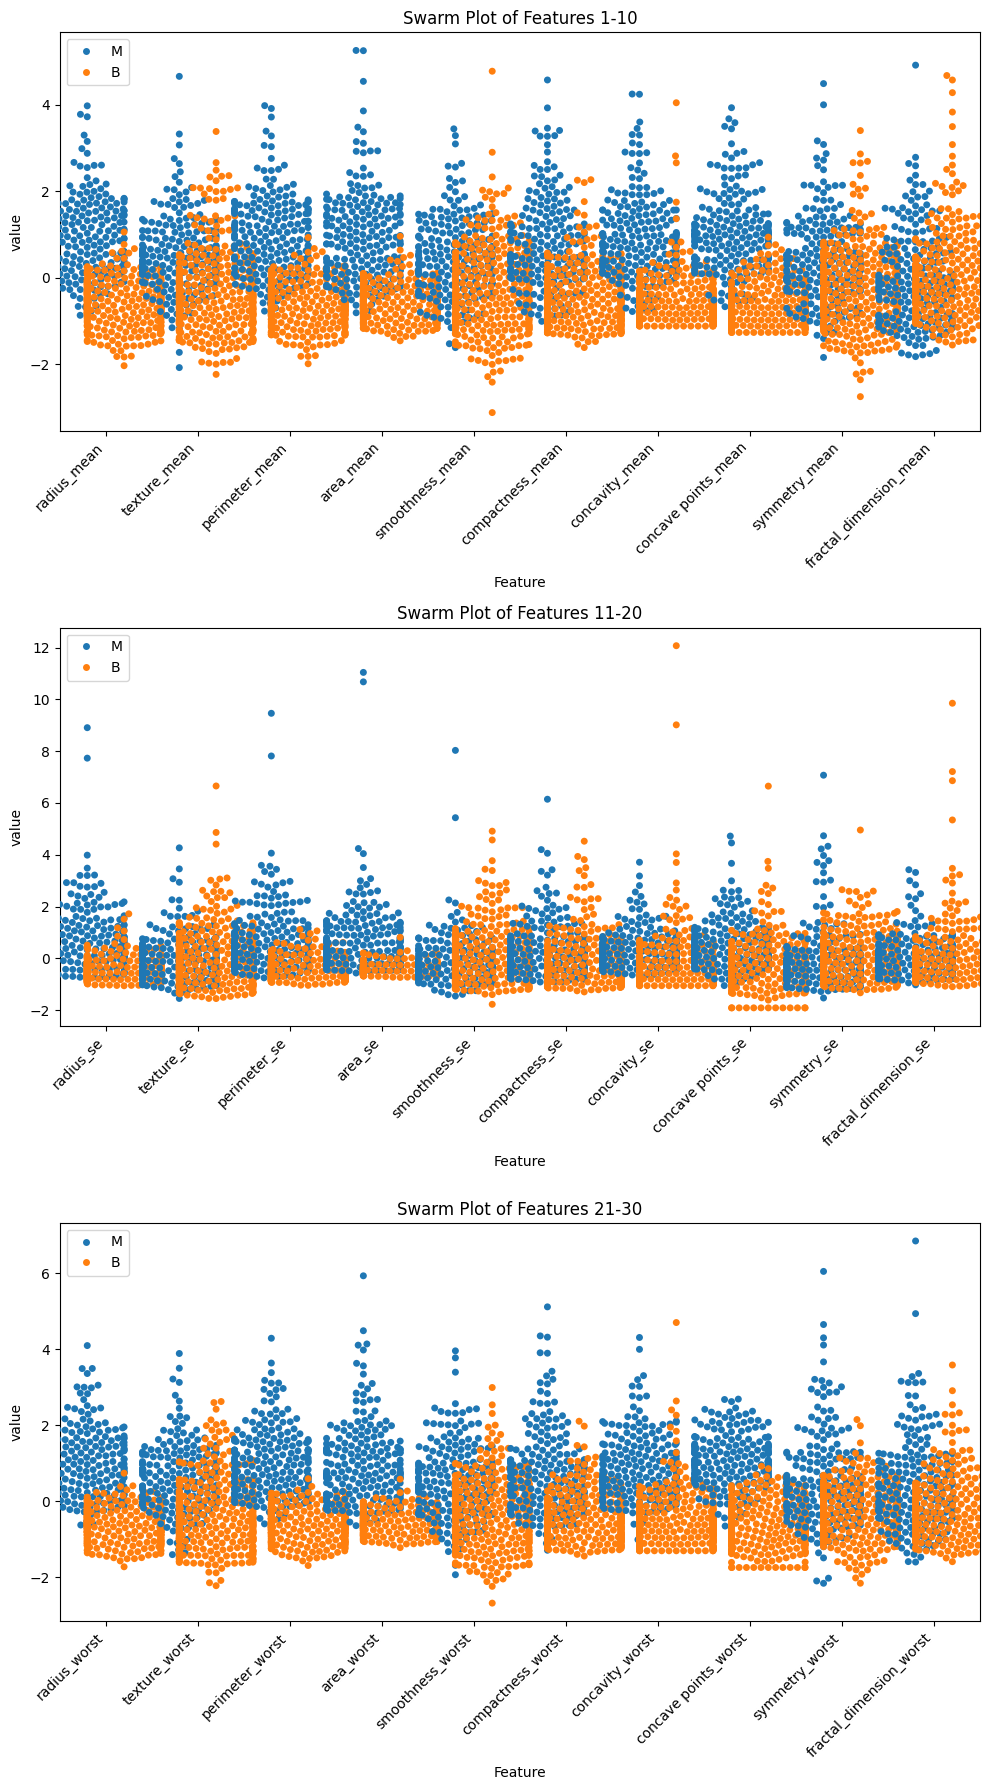

In [10]:
# Violinplot of the complete feature, sepatated into Benign and Malignant

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

# Adding a 'diagnosis' column containing 'M' or 'B' values
scaled_df['diagnosis'] = y

# Dividing the features into three sets for subplots
features_1 = scaled_df.columns[:10]
features_2 = scaled_df.columns[10:20]
features_3 = scaled_df.columns[20:]

# Creating subplots for M and B categories separately
plt.figure(figsize=(10, 18))

for i, features in enumerate([features_1, features_2, features_3], start=1):
    plt.subplot(3, 1, i)
    data_to_plot = pd.melt(scaled_df, id_vars='diagnosis', value_vars=features, var_name='Feature')
    sns.swarmplot(x='Feature', y='value', hue='diagnosis', data=data_to_plot, dodge=True)
    plt.title(f'Swarm Plot of Features {i * 10 - 9}-{i * 10}')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Here we can visualize a bit better the separation of **concavity_mean** and **symmetry_worst**. 

## Outliers

In order to visualize the outliers, we can plot a boxplot. We can also separate the boxplots into Benign and Malignant.

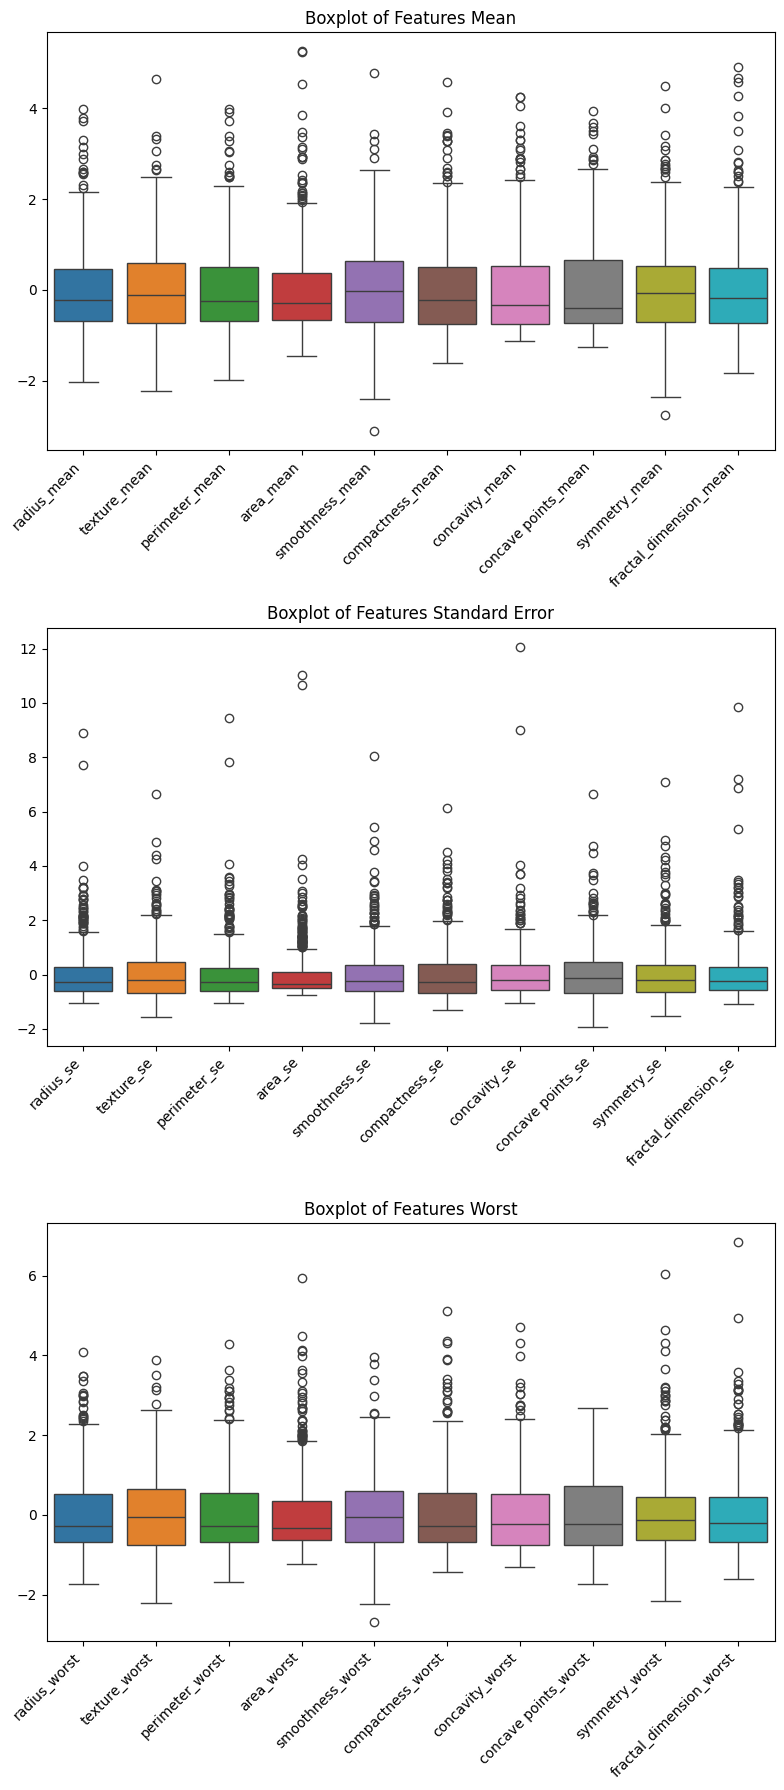

In [11]:
# Boxplot of the complete feature

# Scaling the data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame with column names
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

# Dividing the features into three sets for subplots
features_1 = scaled_df.columns[:10]
features_2 = scaled_df.columns[10:20]
features_3 = scaled_df.columns[20:]

plt.figure(figsize=(8, 18))

# Creating the first subplot for features Mean
plt.subplot(3, 1, 1)
sns.boxplot(data=scaled_df[features_1])
plt.title('Boxplot of Features Mean')
plt.xticks(rotation=45, ha='right') 

# Creating the second subplot for features Standard Error
plt.subplot(3, 1, 2)
sns.boxplot(data=scaled_df[features_2])
plt.title('Boxplot of Features Standard Error')
plt.xticks(rotation=45, ha='right') 

# Creating the third subplot for features Worst
plt.subplot(3, 1, 3)
sns.boxplot(data=scaled_df[features_3])
plt.title('Boxplot of Features Worst')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

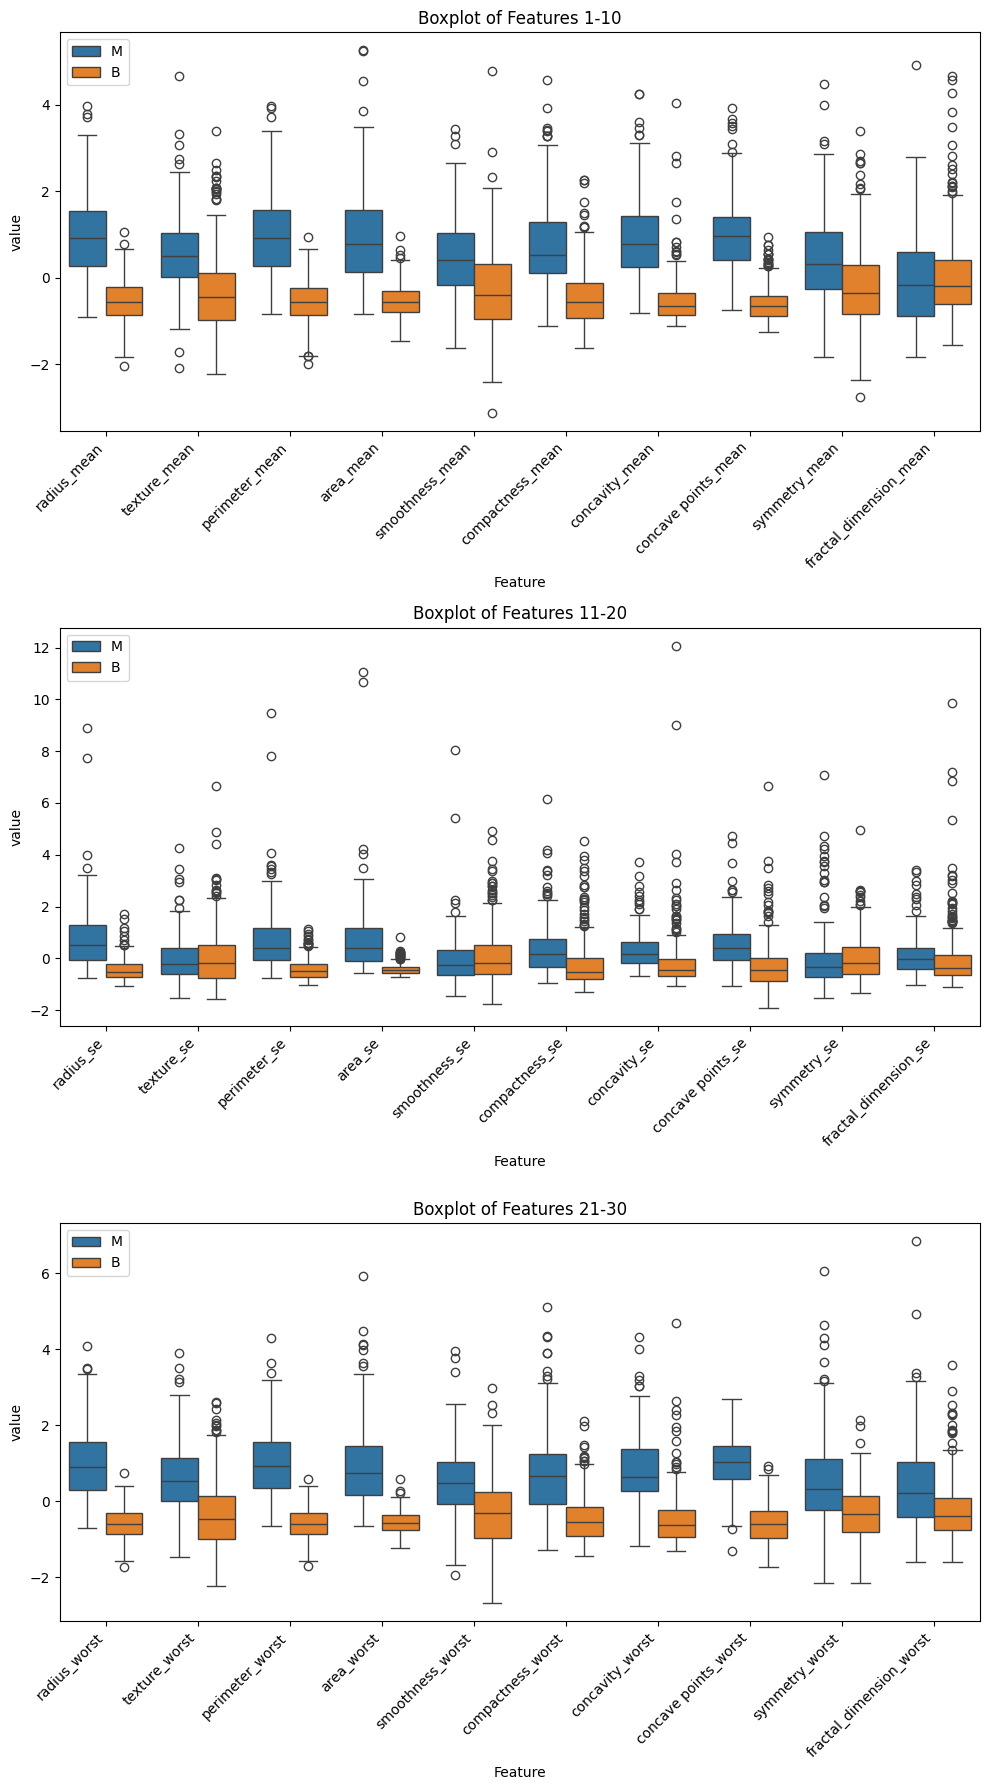

In [12]:
# Boxplot of the complete feature, sepatated into Benign and Malignant

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

# Adding a 'diagnosis' column containing 'M' or 'B' values
scaled_df['diagnosis'] = y

# Dividing the features into three sets for subplots
features_1 = scaled_df.columns[:10]
features_2 = scaled_df.columns[10:20]
features_3 = scaled_df.columns[20:]

# Creating subplots for M and B categories separately
plt.figure(figsize=(10, 18))

for i, features in enumerate([features_1, features_2, features_3], start=1):
    plt.subplot(3, 1, i)
    data_to_plot = pd.melt(scaled_df, id_vars='diagnosis', value_vars=features, var_name='Feature')
    sns.boxplot(x='Feature', y='value', hue='diagnosis', data=data_to_plot)
    plt.title(f'Boxplot of Features {i * 10 - 9}-{i * 10}')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()


The Boxplots show that all features, whether separated into Benign and Malignant or not, have a lot of outliers. This means that a proper Scaling method shall be selected (Robust, Standard or MinMax) depending on the feature.

## Correlations

The best way to visualize the features correlation is by using a Heatmap. Alternativelly a Joint plot and Pearsonr coefficient can be used to visualize two specific features and its correlation.

### Heatmap

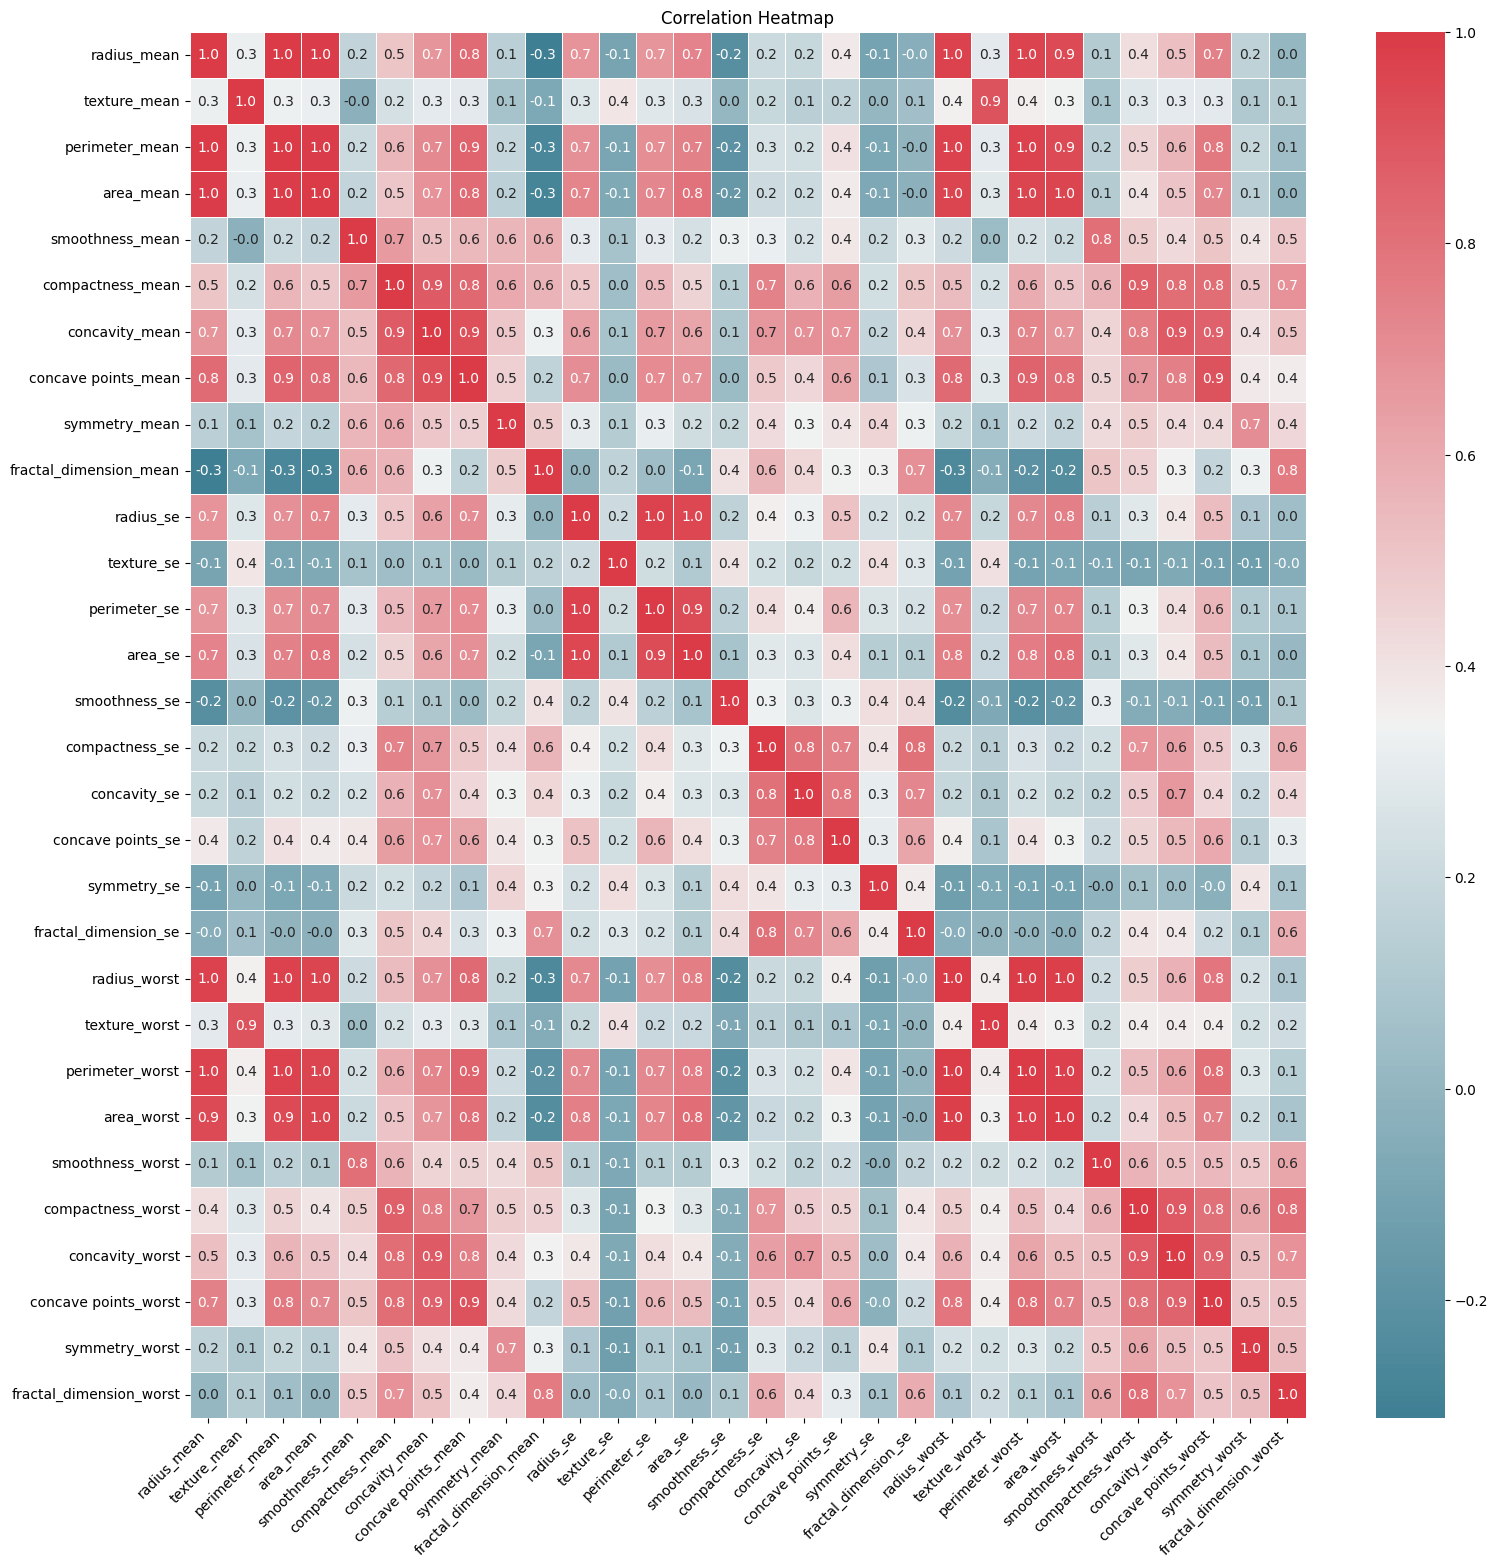

In [13]:
# Plot Bitcoin correlations
f,ax = plt.subplots(figsize=(18, 18))
plt.title('Correlation Heatmap')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=cmap)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

### Jointplot

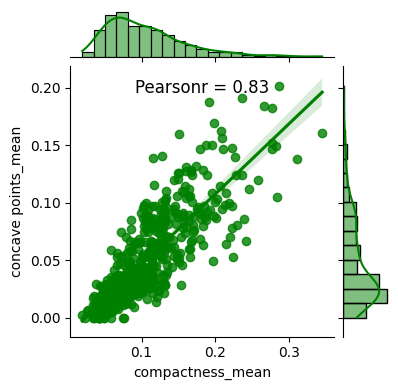

In [14]:
# Calculate Pearson correlation coefficient
corr, _ = pearsonr(X['compactness_mean'], X['concave points_mean'])

# Plotting a joint plot for the two columns with Pearson correlation coefficient
plot = sns.jointplot(x='compactness_mean', y='concave points_mean', data=X, kind="reg", color="green", height=4)

# Annotate Pearson correlation coefficient on the plot
plot.ax_joint.annotate(f"Pearsonr = {corr:.2f}", xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12)

plt.show()

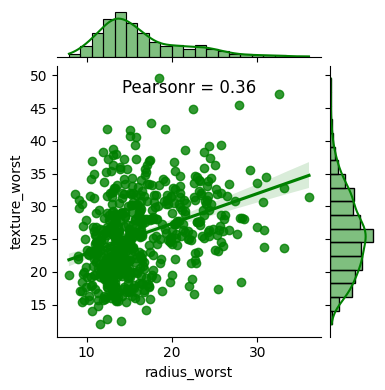

In [15]:
# Calculate Pearson correlation coefficient
corr, _ = pearsonr(X['radius_worst'], X['texture_worst'])

# Plotting a joint plot for the two columns with Pearson correlation coefficient
plot = sns.jointplot(x='radius_worst', y='texture_worst', data=X, kind="reg", color="green", height=4)

# Annotate Pearson correlation coefficient on the plot
plot.ax_joint.annotate(f"Pearsonr = {corr:.2f}", xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12)

plt.show()

### Skewness

Previously the scaler used was StandardScaler. However all features show a significant amount of outlier. As this scaler is very sensitive to outliers, it might be better to use RobustScaler. We can first check the skewness to see the symmetry (Gaussianity ) of the distribution, in order to decide which Scaler works better.

In [16]:
# Checking Skewness

skewness = X.skew()

# Create a new DataFrame with the skewness values
skewness_df = pd.DataFrame(skewness)

# Rename the column '0' to 'skewness'
skewness_df = skewness_df.rename(columns={0: 'skewness'})

skewness_df.sort_values(by='skewness', ascending=False)

skewness
area_se                  5.447186
concavity_se             5.110463
fractal_dimension_se     3.923969
perimeter_se             3.443615
radius_se                3.088612
smoothness_se            2.314450
symmetry_se              2.195133
compactness_se           1.902221
area_worst               1.859373
fractal_dimension_worst  1.662579
texture_se               1.646444
area_mean                1.645732
compactness_worst        1.473555
concave points_se        1.444678
symmetry_worst           1.433928
concavity_mean           1.401180
fractal_dimension_mean   1.304489
compactness_mean         1.190123
concave points_mean      1.171180
concavity_worst          1.150237
perimeter_worst          1.128164
radius_worst             1.103115
perimeter_mean           0.990650
radius_mean              0.942380
symmetry_mean            0.725609
texture_mean             0.650450
texture_worst            0.498321
concave points_worst     0.492616
smoothness_mean          0.456324
smoothness_worst         0.415426

Skewness measures the asymmetry of the probability distribution of a variable.

- If skewness is **close to 0**, the distribution is approximately **symmetrical**.
- If skewness is **greater than 1**, the distribution is **right-skewed** (positively skewed), which means it has a long tail on the right side.
- If skewness is **less than 0**, the distribution is **left-skewed** (negatively skewed), which means it has a long tail on the left side.

Based on the results we have the Symmetrical and Right-Skewed features:

Now we will visualize the Distribution, Outliers and Gaussianity of each features separatelly.

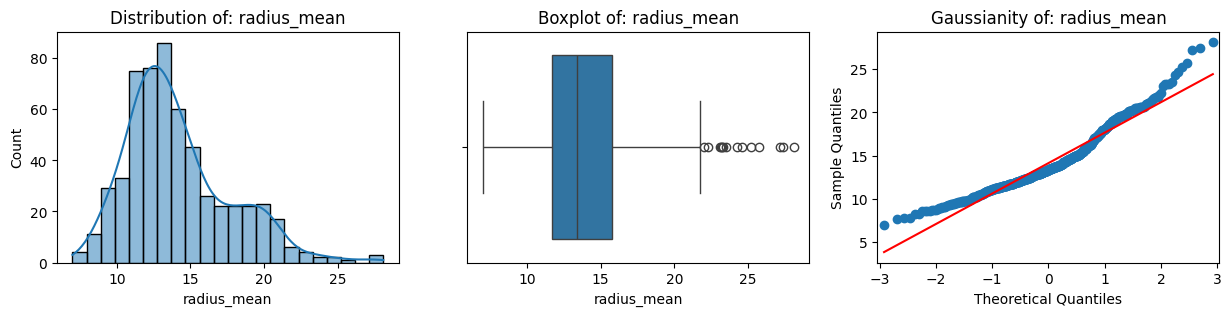

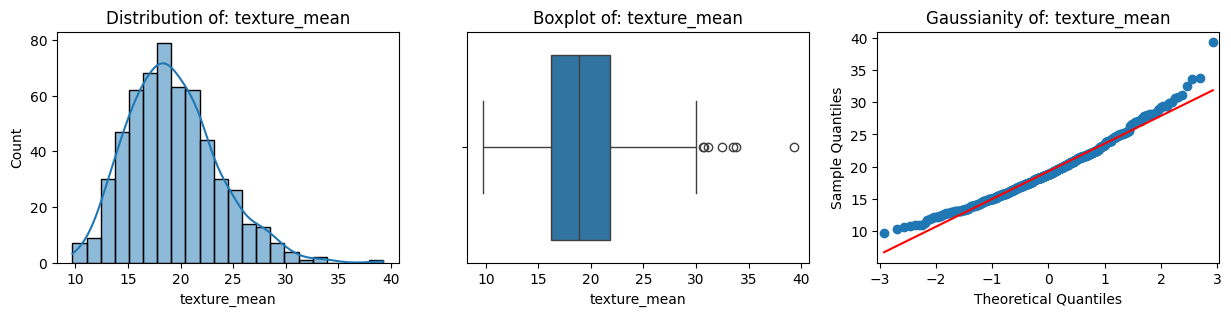

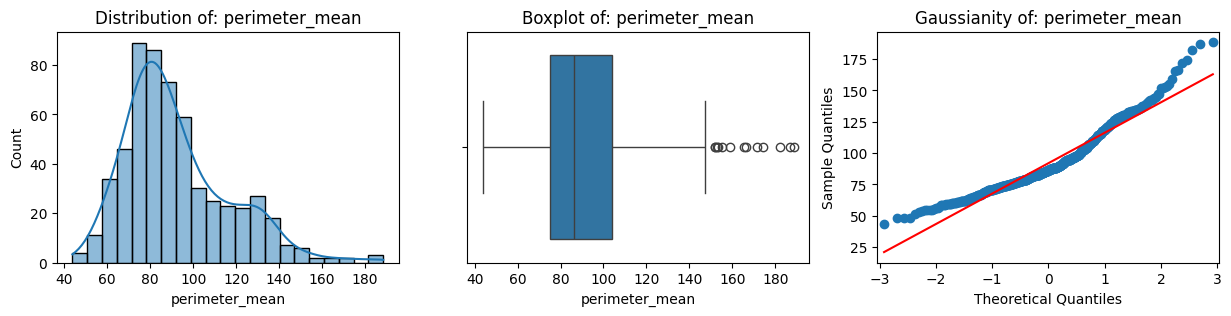

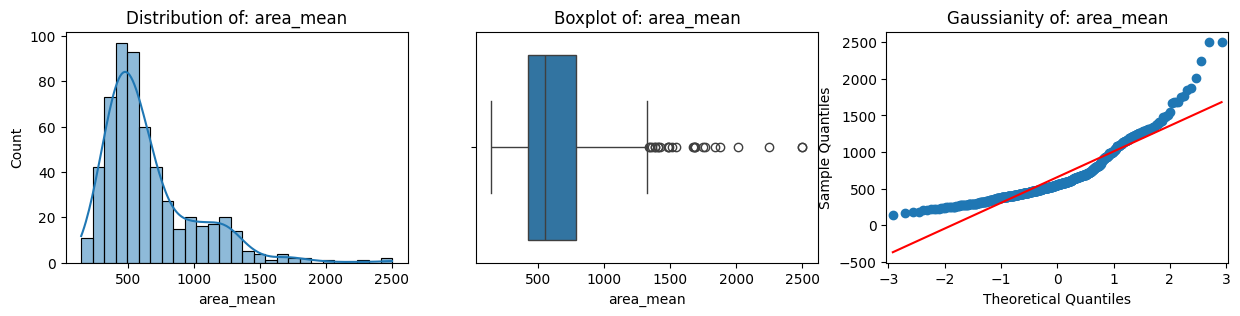

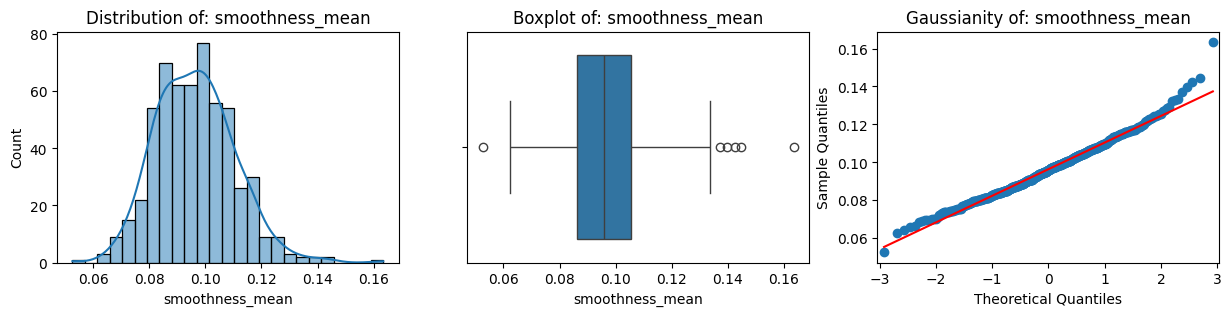

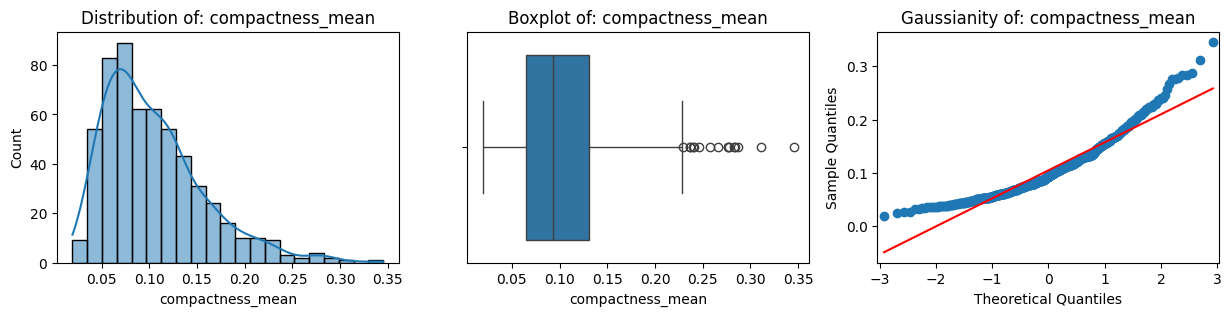

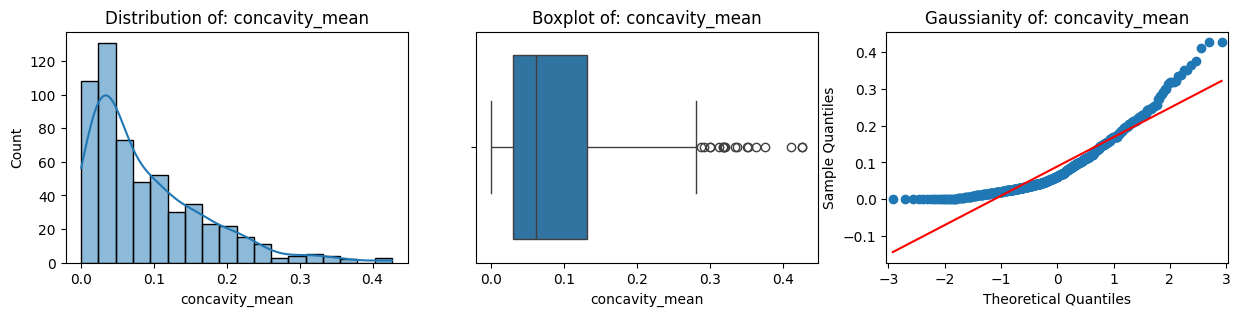

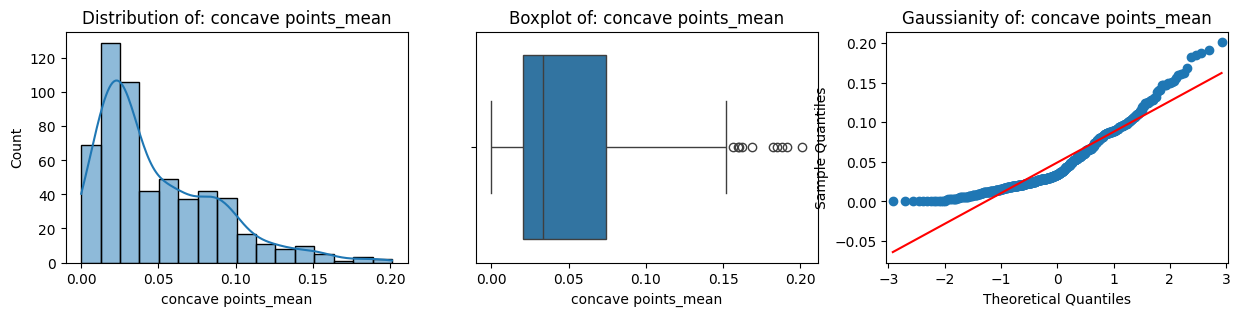

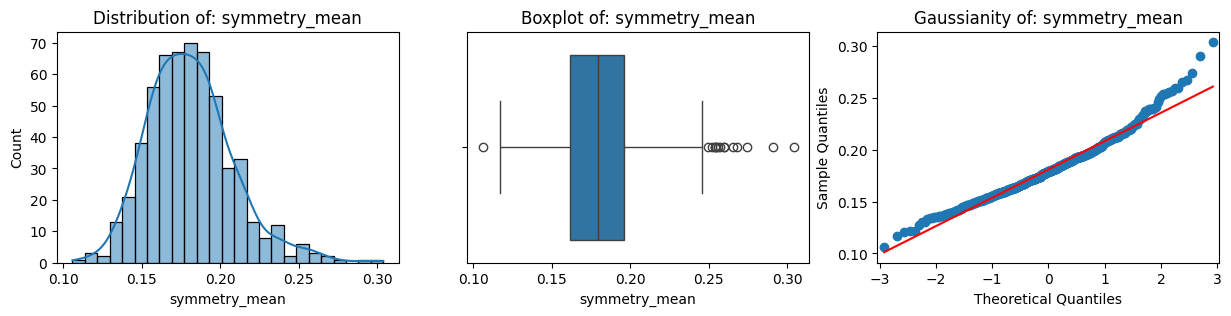

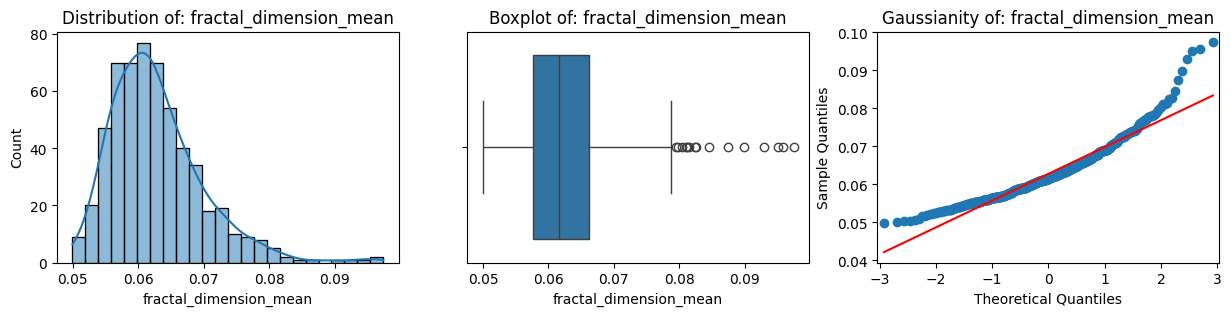

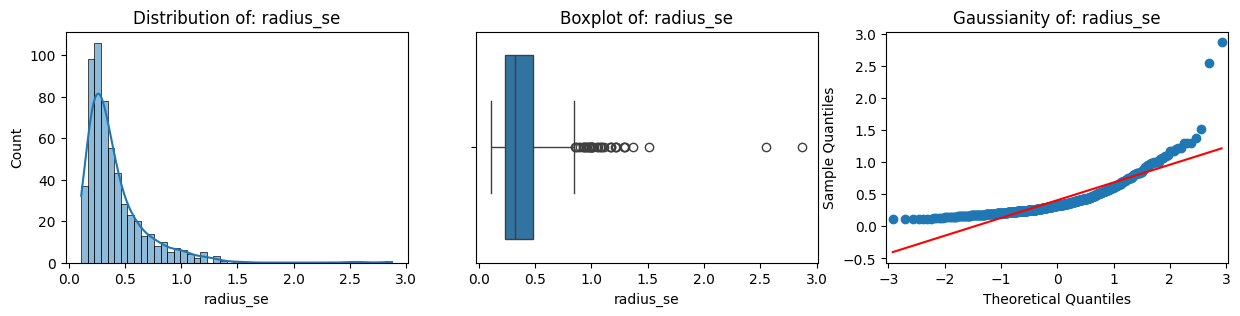

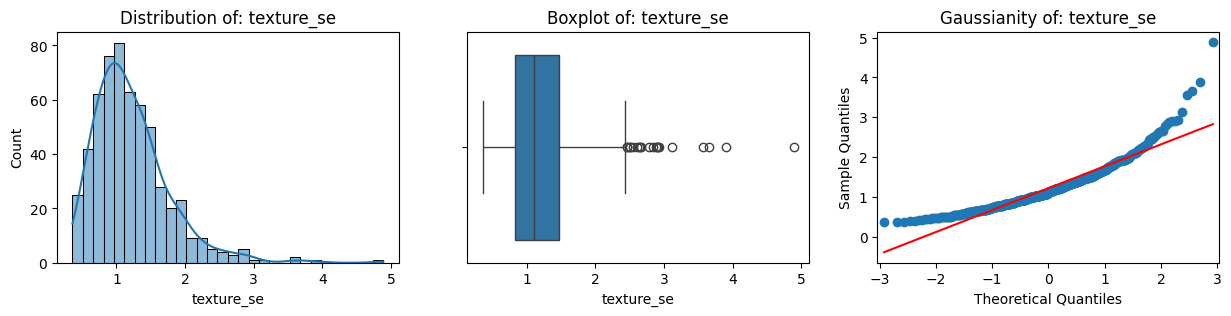

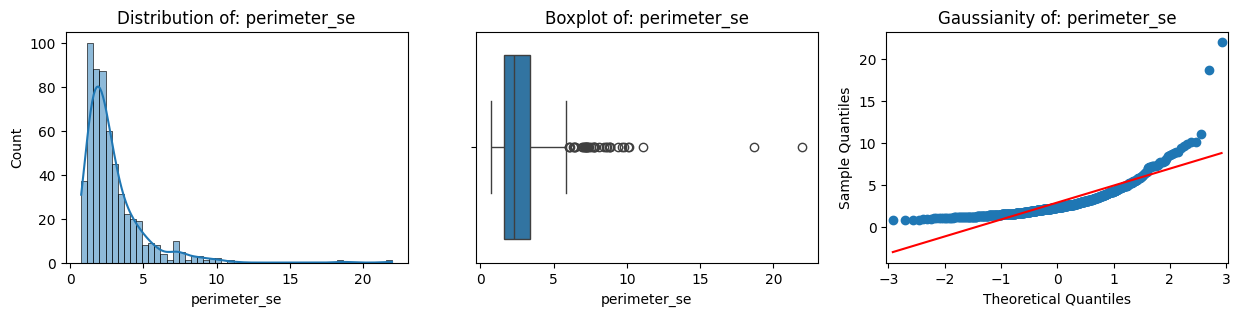

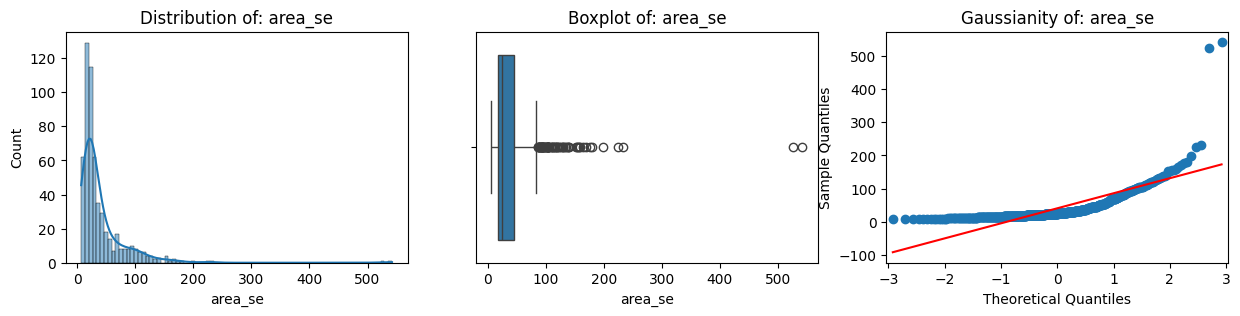

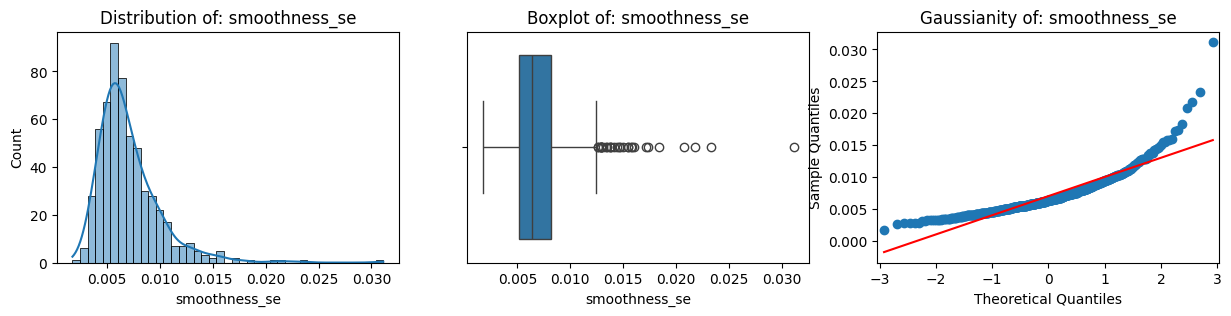

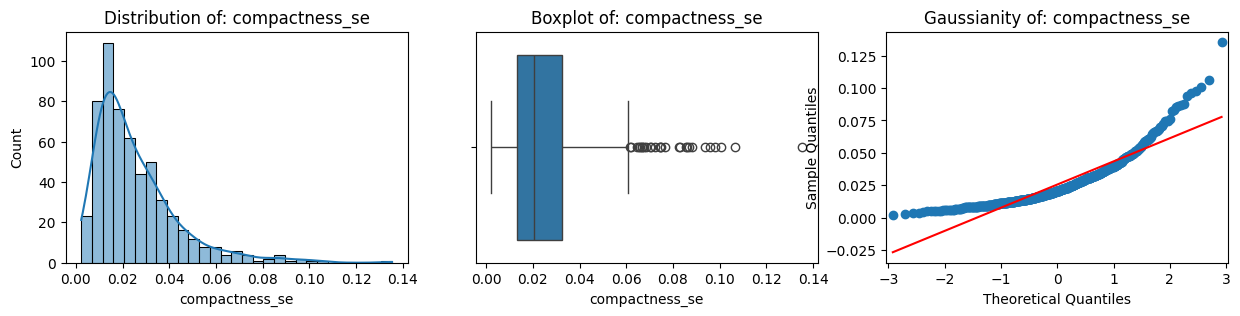

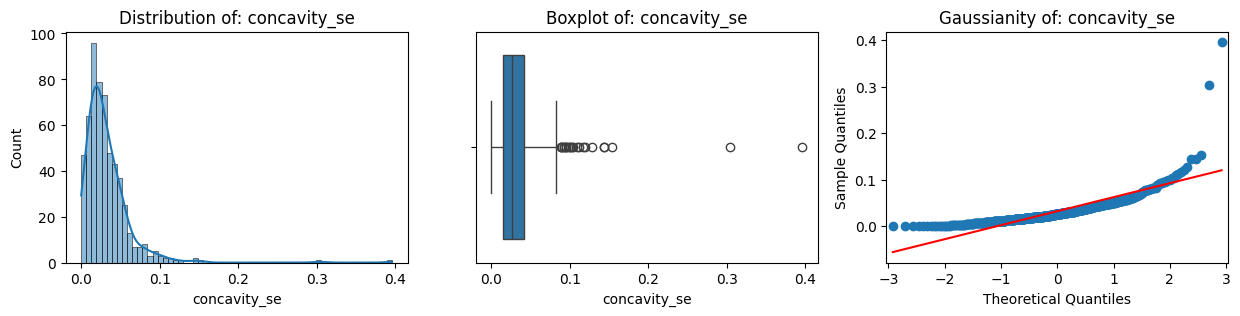

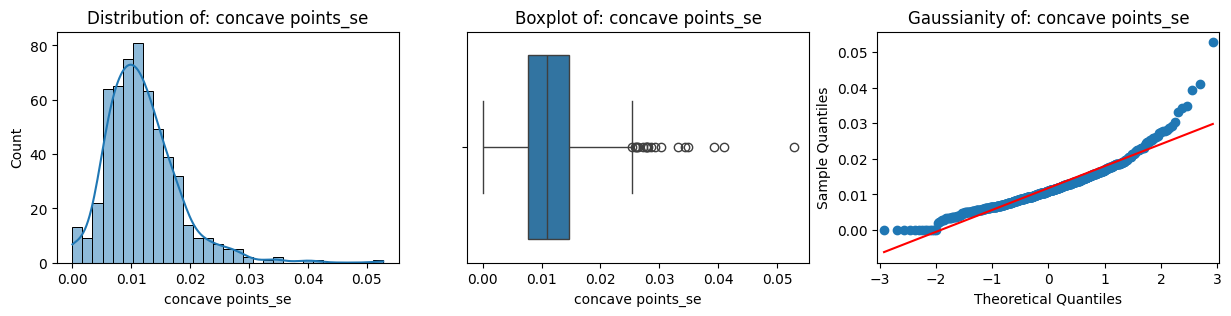

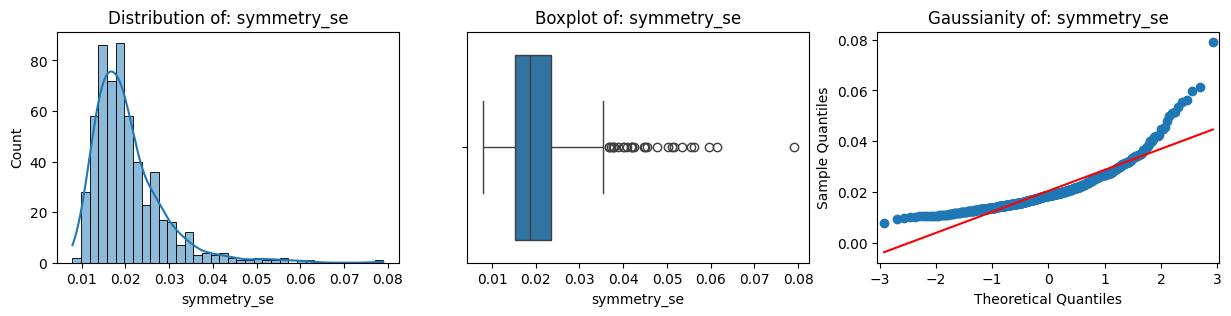

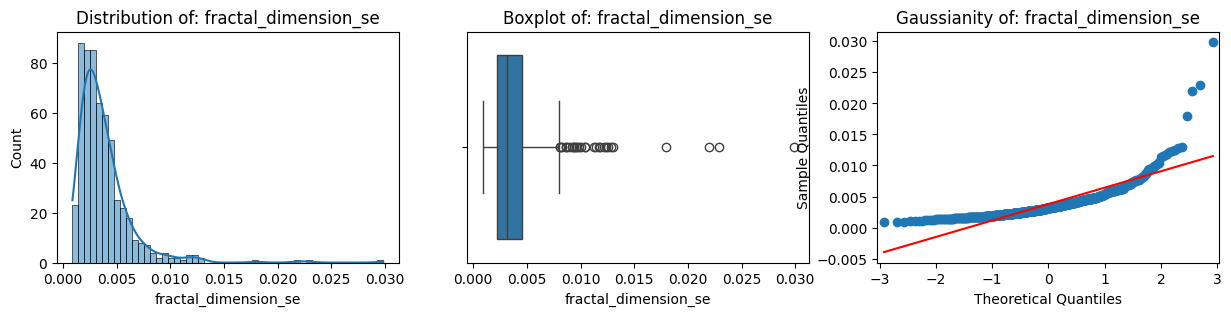

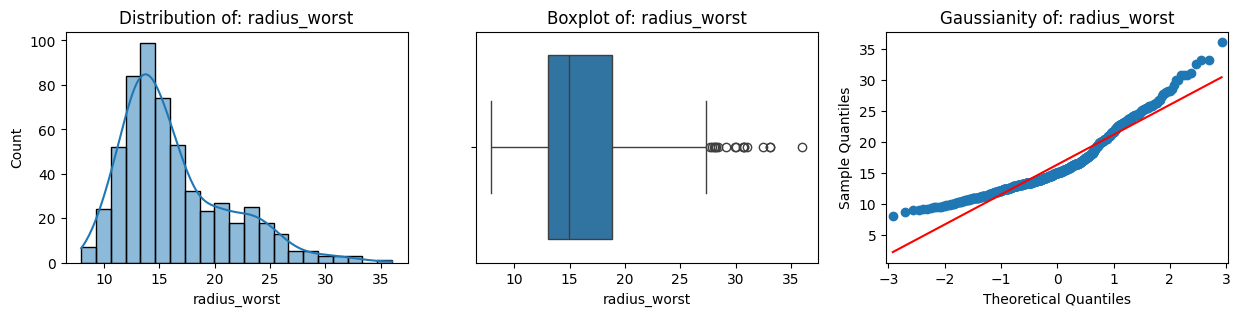

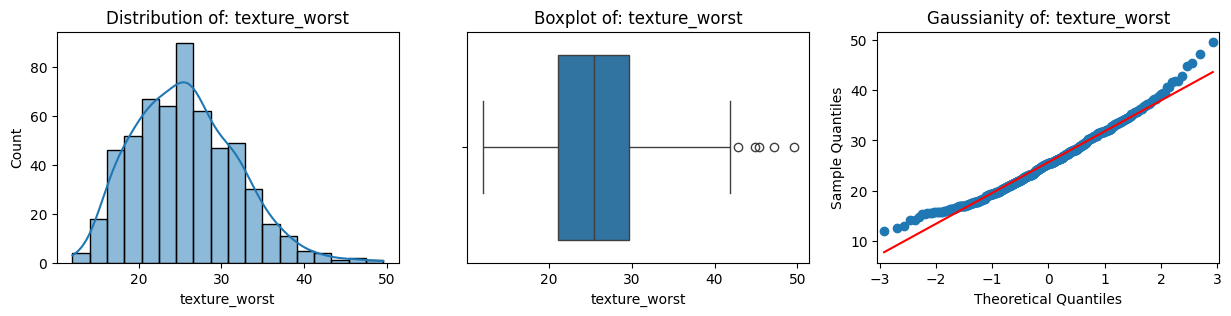

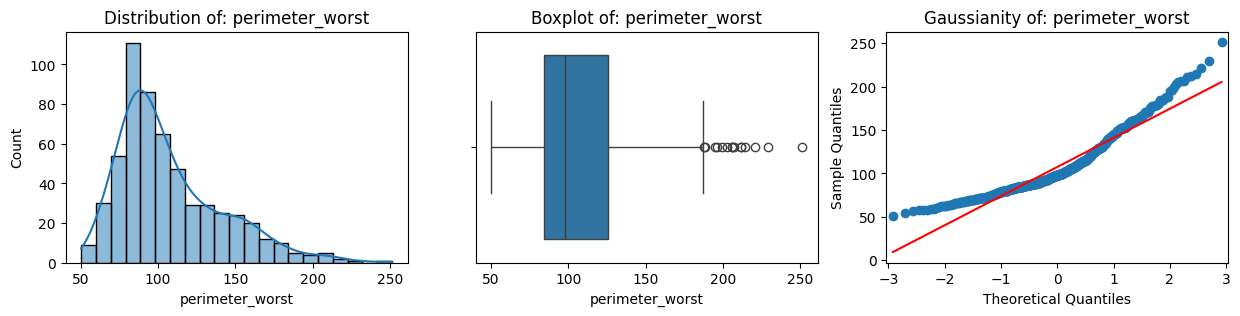

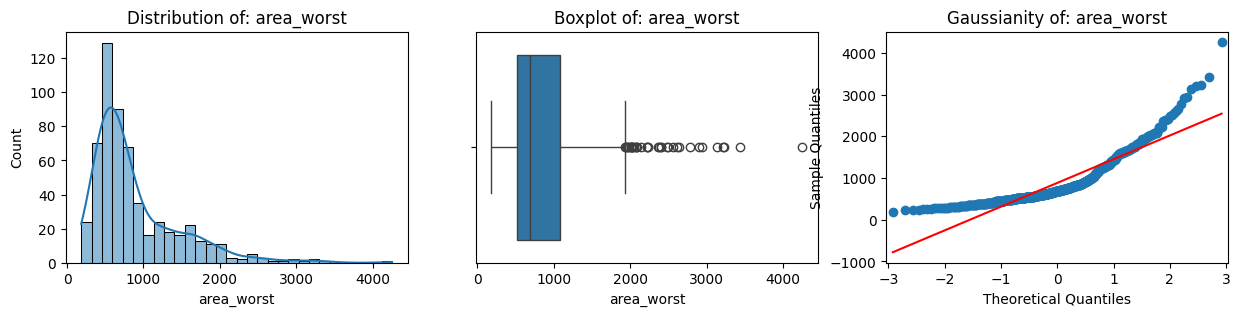

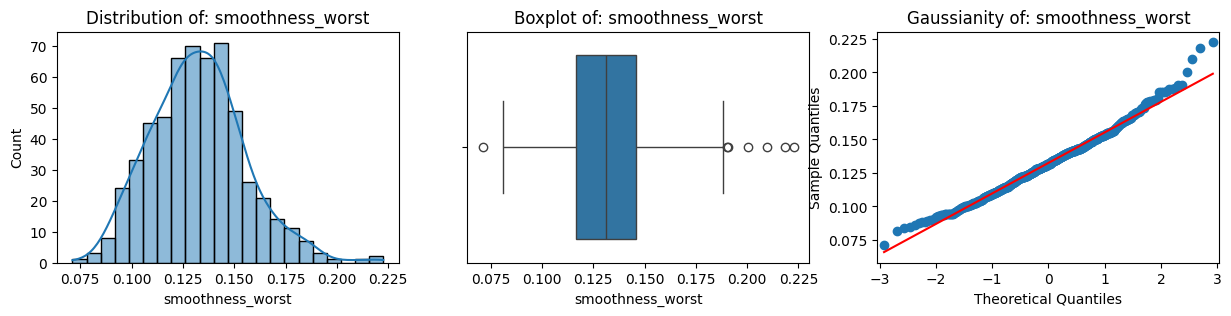

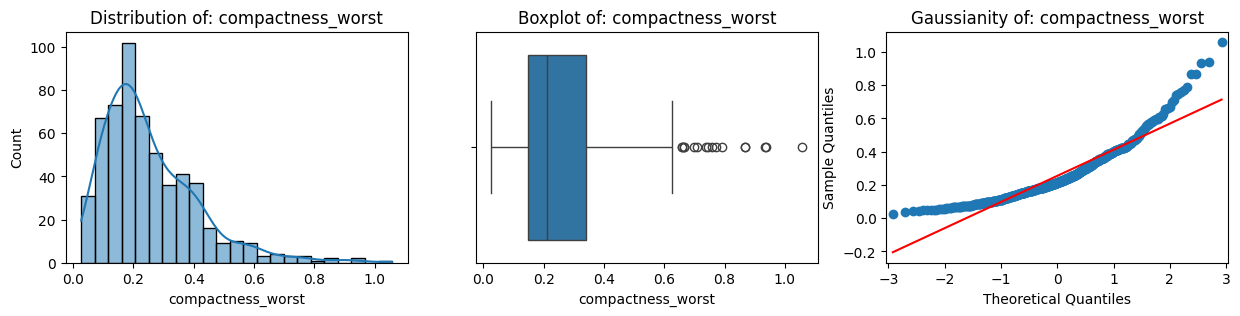

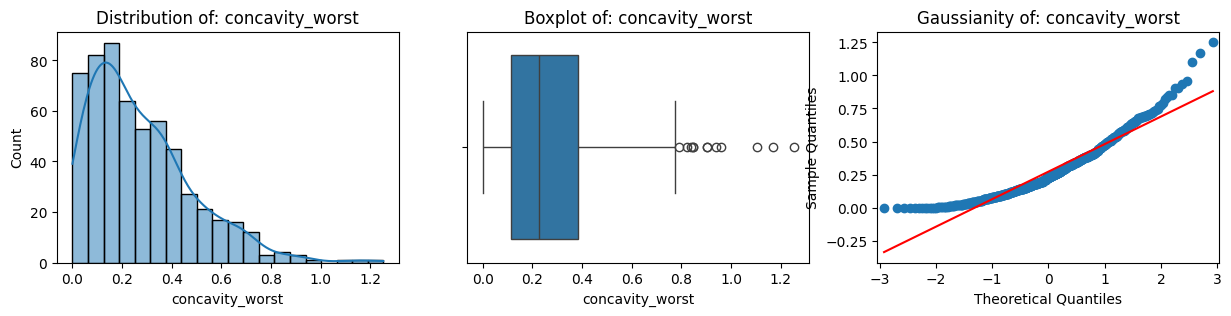

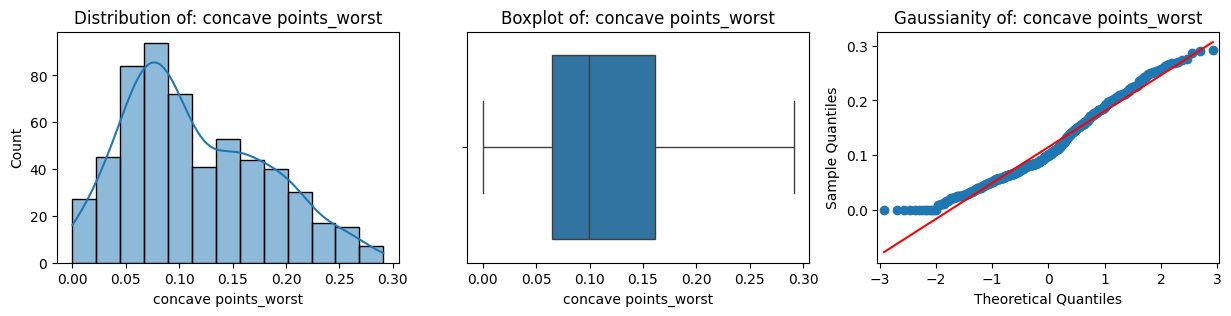

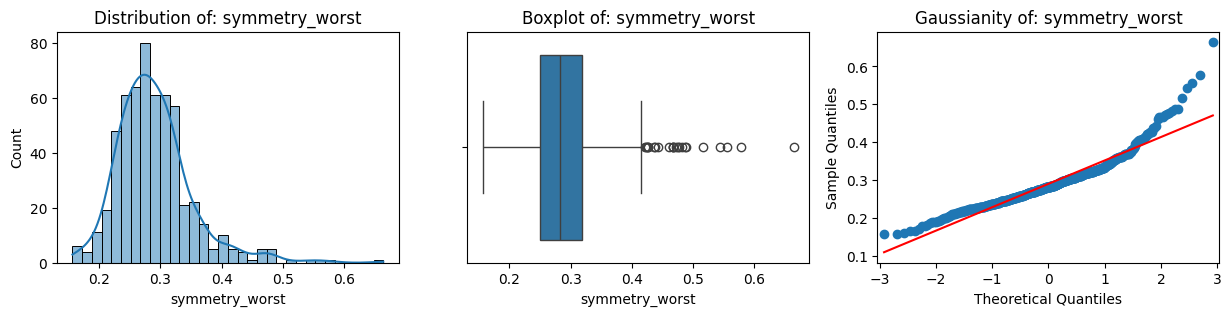

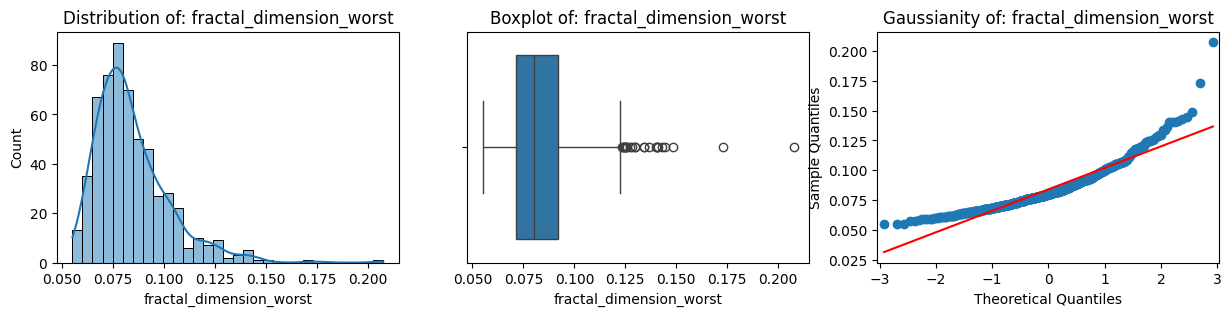

In [17]:
# Visualization

for numerical_feature in X.columns:
    
    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
    
    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = X, x = numerical_feature, kde=True, ax = ax[0])
    
    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = X, x = numerical_feature, ax=ax[1])
    
    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(X[numerical_feature],line='s',ax=ax[2]);

Based on the Distributions we will select different scalers for our features preprocessing.


***StandardScaler:***

- StandardScaler scales features by subtracting the mean and dividing by the standard deviation.
- It assumes that the data is *normally distributed* (or at least approximately normally distributed) and it is *sensitive to outliers*
- *Facit:*  when data is normally distributed or when you want to transform the data to have a mean of 0 and a standard deviation of 1.

***RobustScaler:***

- RobustScaler scales features using statistics that are robust to outliers, making it suitable for data with many outliers or a heavy-tailed distribution.
- It uses the median and the interquartile range (IQR) for scaling, rather than the mean and standard deviation used in StandardScaler.
- *Facit:* when data contains significant outliers, and you want to prevent them from heavily influencing the scaling process.

***MinMaxScaler:***

- MinMaxScaler scales features to a specified range, typically between 0 and 1.
- It works well when the data needs to be scaled to a specific range, and there are no significant outliers.
- Good if we do not have a Gaussian Distribution in the feature
- It neither reduces the effect of outliers nor changes skewness.
- *Facit:* when you want to preserve the relative relationships between the data points and map them to a specific range. a specific range.

In [23]:
# X.columns

In [22]:
# Selected Scalers

features_robust = [
                    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "compactness_mean", "concavity_mean",
                    "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
                    "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se",
                    "fractal_dimension_se", "radius_worst", "perimeter_worst", "area_worst", "compactness_worst", "concavity_worst",
                    "symmetry_worst", "fractal_dimension_worst"
                ]

features_standard = ["smoothness_mean", "texture_worst", "smoothness_worst"]

features_minmax = ["concave points_worst"]

26

In [27]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create a Spark session
spark = SparkSession.builder.appName("BreastCancerClassification").getOrCreate()

# Load your dataset (assuming it's in a format supported by Spark, like CSV)
# Replace 'path_to_your_data' with the actual path to your dataset
data = spark.read.csv("data/data.csv", header=True, inferSchema=True)

# Assume you have prepared your data such that the features are in a single column called 'features'
# If not, you can use VectorAssembler to combine your features into a single column
assembler = VectorAssembler(inputCols=features_robust + features_standard + features_minmax, outputCol="features")
data_assembled = assembler.transform(data)

# Split the data into training and testing sets
(train_data, test_data) = data_assembled.randomSplit([0.7, 0.3], seed=42)

# Create a Random Forest Classifier
rf = RandomForestClassifier(labelCol="label_column_name", featuresCol="features")

# Train the model
model = rf.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label_column_name", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Stop the Spark session
spark.stop()


PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.